In [ ]:
import requests
import pandas as pd
import re
import numpy as np
import os

import math
import statistics

from bs4 import BeautifulSoup

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'}

# Import data

In [2]:
df = pd.read_csv('nyc_therapists_cleaned.csv')

In [ ]:
df.head(2)

In [ ]:
df.dtypes

# Analyse the data and plot some charts

In [ ]:
df.yrs_in_practice_range.value_counts(dropna=False)

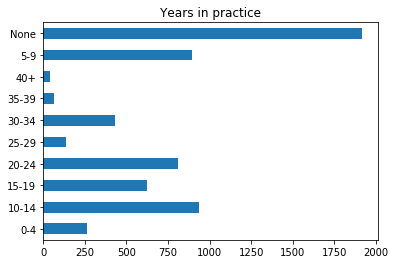

In [4]:
df.yrs_in_practice_range.value_counts().sort_index().plot(kind='barh', title='Years in practice')

plt.savefig("therapists-yrs-in-practice.pdf")

In [8]:
df['grad_yr_bin'] = pd.cut(df.grad_yr, 10)

# Most therapists who put 'none' as their years in practice are relatively young

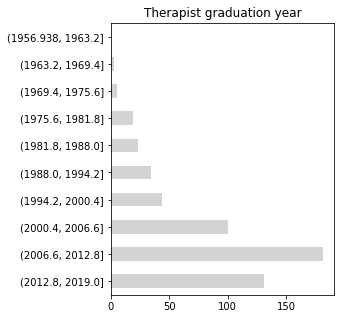

In [19]:
df[df.yrs_in_practice_range == 'None'].grad_yr_bin.value_counts(sort=False).sort_index(ascending=False).plot(kind='barh', 
                                             title='Therapist graduation year', 
                                             figsize=(4,5), color='lightgrey', rot=0)

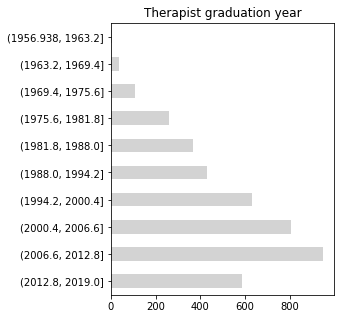

In [18]:
# Drop NaN from chart
df.grad_yr_bin.value_counts(sort=False).sort_index(ascending=False).plot(kind='barh', 
                                             title='Therapist graduation year', 
                                             figsize=(4,5), color='lightgrey', rot=0)

plt.savefig("therapists-grad-yr.pdf")

In [ ]:
df.shape

In [ ]:
race_columns = df.columns[df.columns.str.contains("focus_")]
df[race_columns].sum()

In [ ]:
races = {}
races['afam'] = df.focus_afam.sum()
races['asian'] = df.focus_asian.sum()
races['latino'] = df.focus_latino_hispanic.sum()
races['pacific'] = df.focus_pacific_islander.sum()
races['native'] = df.focus_native_am.sum()
races['other'] = df.focus_other_races.sum()

In [ ]:
df_races = pd.DataFrame.from_dict(races, orient='index').sort_values(0)
df_races

In [ ]:
# none = df[df.focus_afam == 0].focus_afam.count() + df[df.focus_asian == 0].focus_asian.count() + \
#         df[df.focus_latino_hispanic == 0].focus_latino_hispanic.count() + \
#         df[df.focus_pacific_islander == 0].focus_pacific_islander.count() + \
#         df[df.focus_native_am == 0].focus_native_am.count() + \
#         df[df.focus_other_races == 0].focus_other_races.count()
# none

In [ ]:
df_races.plot(kind='barh', title="Ethnicities served by NYC therapists", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-race-focus.pdf")

In [ ]:
rows = {}
rows['adults'] = df.focus_adults.sum()
rows['elders'] = df.focus_elders.sum()
rows['children'] = df.focus_children.sum()
rows['teenagers'] = df.focus_teenagers.sum()
rows['toddlers'] = df.focus_toddlers.sum()

In [ ]:
print(df_races.sum())
# rows['none'] = 6119 - 10463

# df_races = pd.DataFrame.from_dict(races, orient='index').sort_values(0)
# df_races

In [ ]:
df_age.plot(kind='barh', title="Age groups served by NYC therapists", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-age-focus.pdf")

In [ ]:
rows = {}
rows['alcohol'] = df.issues_alcohol.sum()
rows['anxiety'] = df.issues_anxiety.sum()
rows['career'] = df.issues_career.sum()
rows['divorce'] = df.issues_divorce.sum()
rows['domestic abuse'] = df.issues_domesticabuse.sum()
rows['drugs'] = df.issues_drug.sum()
rows['family'] = df.issues_family.sum()
rows['relationship'] = df.issues_relationship.sum()
rows['sexual abuse'] = df.issues_sexabuse.sum()
rows['stress'] = df.issues_stress.sum()
rows['trauma'] = df.issues_trauma.sum()

df_issues = pd.DataFrame.from_dict(rows, orient='index').sort_values(0)
df_issues

In [ ]:
df_issues.plot(kind='barh', title="Issues treated by  NYC therapists", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-issues-focus.pdf")

In [ ]:
rows = {}
rows['CBT'] = df.therapy_cbt.sum()
rows['family therapy'] = df.therapy_family.sum()
rows['interpersonal therapy'] = df.therapy_interpersonal.sum()
rows['marital therapy'] = df.therapy_marital.sum()
rows['psychoanalytic'] = df.therapy_psychoanalytic.sum()
rows['psychodynamic'] = df.therapy_psychodynamic.sum()

df_therapy = pd.DataFrame.from_dict(rows, orient='index').sort_values(0)
df_therapy

In [ ]:
df_therapy.plot(kind='barh', title="Therapy types, NYC", figsize=(4,4), width=0.9,
              color='lightgrey')

plt.savefig("therapists-issues-focus.pdf")

# Chart the breakdown of therapy types by years in practice

In [ ]:
df.dtypes

# ???????

In [ ]:
att = sns.load_dataset("df")
g = sns.FacetGrid(att, col="yrs_in_practice_range", col_wrap=5, height=1.5)
g = g.map(plt.plot, "yrs_in_practice_range", "score", marker=".")